In [0]:
# Importing the necessary packages

import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
%env KERAS_BACKEND=theano

env: KERAS_BACKEND=theano


In [3]:
# Importing the dataset from keras

from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using Theano backend.


11493376/11490434 [==============================] - 2s 0us/step


In [0]:
# Getting to know the dataset

In [5]:
# Checking the 'type'

print(type(x_train))
print(type(x_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [6]:
# Checking the shape

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


<Figure size 432x288 with 0 Axes>

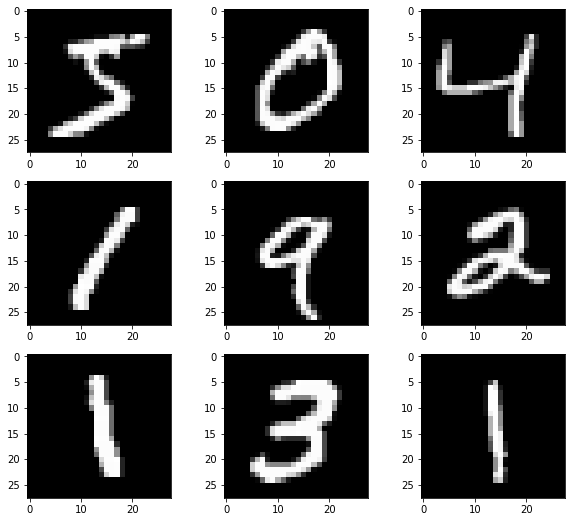

In [7]:
plt.gray() # B/W images

plt.figure(figsize = (10,9)) # Adjusting figure size

# Displaying a grid of 3x3 images

plt.gray()

for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i])

In [8]:
# Printing examples in 'y_train'

for i in range(5):
  print(y_train[i])

5
0
4
1
9


In [0]:
# PREPROCESSING

In [10]:
# Checking the minimum and maximum values of x_train

print(x_train.min())
print(x_train.max())

0
255


In [0]:
# Data Normalization

# Conversion to float

x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')

# Normalization

x_train = x_train/255.0
x_test = x_test/255.0

In [12]:
# Checking the minimum and maximum values of x_train

print(x_train.min())
print(x_train.max())

0.0
1.0


In [0]:
# Reshaping input data

X_train = x_train.reshape(len(x_train),-1)
X_test = x_test.reshape(len(x_test),-1)

In [14]:
# Checking the shape

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [0]:
# Building the model

In [16]:
from sklearn.cluster import MiniBatchKMeans

total_clusters = len(np.unique(y_test))

# Initialize the K-Means model

kmeans = MiniBatchKMeans(n_clusters = total_clusters)

# Fitting the model to training set

kmeans.fit(X_train)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=10, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [17]:
kmeans.labels_

array([8, 7, 9, ..., 6, 8, 6], dtype=int32)

In [18]:
len(kmeans.labels_)

60000

In [19]:
kmeans.n_clusters

10

In [0]:
def retrieve_info(cluster_labels,y_train):
  '''
  Associates most probable label with each cluster in KMeans model
  returns: dictionary of clusters assigned to each label

  '''

  # Initializing 

  reference_labels = {}

  # For loop to run through each label of cluster label

  for i in range(len(np.unique(kmeans.labels_))):

    index = np.where(cluster_labels == i,1,0)
    num = np.bincount(y_train[index==1]).argmax()
    reference_labels[i] = num

  return reference_labels

In [0]:
reference_labels = retrieve_info(kmeans.labels_,y_train)

In [22]:
print(reference_labels)

{0: 6, 1: 7, 2: 3, 3: 2, 4: 1, 5: 0, 6: 8, 7: 0, 8: 5, 9: 4}


In [0]:
# 'number_labels' is a list which denotes the number displayed in image

number_labels = np.random.rand(len(kmeans.labels_))

for i in range(len(kmeans.labels_)):

  number_labels[i] = reference_labels[kmeans.labels_[i]]

In [24]:
# Comparing Predicted values and Actual values

print(number_labels[:20].astype('int'))
print(y_train[:20])

[5 0 4 1 7 2 1 8 1 7 3 1 3 6 1 7 2 8 6 7]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [25]:
(y_train == number_labels).sum()

35731

In [26]:
# Calculating accuracy score

from sklearn.metrics import accuracy_score

print(accuracy_score(number_labels,y_train))

0.5955166666666667


In [0]:
# Optimizing and Evaluating the Clustering Algorithm

In [0]:
# Function to calculate metrics for the model

def calculate_metrics(model,output):
  
  print('Number of clusters is {}'.format(model.n_clusters))
  print('Inertia : {}'.format(model.inertia_))
  print('Homogeneity : {}'.format(metrics.homogeneity_score(output,model.labels_)))

In [28]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

cluster_number = [10,16,36,64,144,256]

for i in cluster_number:

  
  total_clusters = len(np.unique(y_test))


 # Initialize the K-Means model

  kmeans = MiniBatchKMeans(n_clusters = i)

# Fitting the model to training set

  kmeans.fit(X_train)

# Calculating the metrics
   
  calculate_metrics(kmeans,y_train)

# Calculating reference_labels

  reference_labels = retrieve_info(kmeans.labels_,y_train)

# 'number_labels' is a list which denotes the number displayed in image

  number_labels = np.random.rand(len(kmeans.labels_))

  for i in range(len(kmeans.labels_)):
    
    number_labels[i] = reference_labels[kmeans.labels_[i]]
  
  print('Accuracy score : {}'.format(accuracy_score(number_labels,y_train)))

  print('\n')

Number of clusters is 10
Inertia : 2377300.0
Homogeneity : 0.47510907685698006
Accuracy score : 0.5849166666666666


Number of clusters is 16
Inertia : 2212171.0
Homogeneity : 0.5634420533759559
Accuracy score : 0.65355


Number of clusters is 36
Inertia : 1964035.25
Homogeneity : 0.674075224114382
Accuracy score : 0.7595833333333334


Number of clusters is 64
Inertia : 1810493.5
Homogeneity : 0.7387456019814561
Accuracy score : 0.8092333333333334


Number of clusters is 144
Inertia : 1632881.875
Homogeneity : 0.7990882263554224
Accuracy score : 0.85425


Number of clusters is 256
Inertia : 1516097.0
Homogeneity : 0.8389581062822128
Accuracy score : 0.8947




In [29]:
# Testing model on Testing set

# Initialize the K-Means model

kmeans = MiniBatchKMeans(n_clusters = 256)

# Fitting the model to testing set

kmeans.fit(X_test)

# Calculating the metrics

calculate_metrics(kmeans,y_test)

# Calculating the reference_labels

reference_labels = retrieve_info(kmeans.labels_,y_test)

# 'number_labels' is a list which denotes the number displayed in image

number_labels = np.random.rand(len(kmeans.labels_))

for i in range(len(kmeans.labels_)):
     
  number_labels[i] = reference_labels[kmeans.labels_[i]]
  
print('Accuracy score : {}'.format(accuracy_score(number_labels,y_test)))

print('\n')

Number of clusters is 256
Inertia : 247619.28125
Homogeneity : 0.8521182274929862
Accuracy score : 0.8935




In [0]:
# Cluster centroids is stored in 'centroids'

centroids = kmeans.cluster_centers_

In [31]:
centroids.shape

(256, 784)

In [0]:
centroids = centroids.reshape(256,28,28)

In [33]:
centroids.shape

(256, 28, 28)

In [0]:
# Nullifying the Normalization effect

centroids = centroids * 255

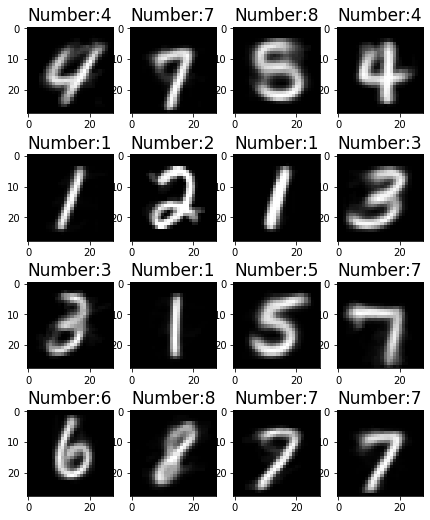

In [35]:
plt.figure(figsize = (10,9))

bottom = 0.35

for i in range(16):
  plt.subplots_adjust(bottom)
  plt.subplot(4,4,i+1)
  plt.title('Number:{}'.format(reference_labels[i]),fontsize = 17)
  plt.imshow(centroids[i])

In [0]:
# Predicting number displayed in user input image

In [40]:
# Uploading image in Google Colab

from google.colab import files
uploaded = files.upload()

Saving number_4.jpg to number_4.jpg


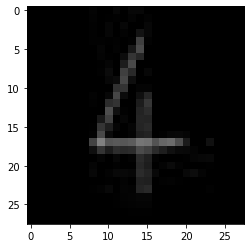

In [41]:
# Reading the image

image = plt.imread('number_4.jpg')
plt.imshow(image)

In [42]:
image.shape

(28, 28, 3)

In [0]:
# RGB image is converted to Monochrome image

from skimage import color
from skimage import io

image = color.rgb2gray(io.imread('number_4.jpg'))

In [44]:
image.shape

(28, 28)

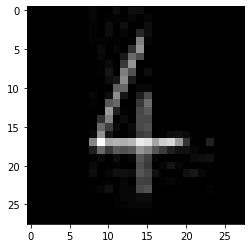

In [45]:
plt.imshow(image)

In [0]:
# Reshaping into a row vector

image = image.reshape(1,28*28)

In [47]:
image.shape

(1, 784)

In [48]:
X_train.shape

(60000, 784)

In [0]:
# Initialize the K-Means model

kmeans = MiniBatchKMeans(n_clusters = 256)

# Fitting the model to testing set

kmeans.fit(X_train)

# Calculating the reference_labels

reference_labels = retrieve_info(kmeans.labels_,y_train)

# 'number_labels' is a list which denotes the number displayed in image

number_labels = np.random.rand(len(kmeans.labels_))

for i in range(len(kmeans.labels_)):
     
  number_labels[i] = reference_labels[kmeans.labels_[i]]


In [0]:
# The cluster into which the image is classified into is predicted.

predicted_cluster = kmeans.predict(image)

In [59]:
# The number in the image is predicted.

number_labels[[predicted_cluster]]

array([4.])